#### Imports

In [1]:
import pandas as pd
import requests
import math

# Exercises

In [2]:
base_url = "https://swapi.dev/api/"

In [3]:
ppl_url = base_url + 'people/'

The end result of this exercise should be a file named acquire.py.

- Using the code from the lesson as a guide and the REST API from https://swapi.dev/ as we did in the lesson, create a dataframe named people that has all of the data for people.

In [4]:
response = requests.get(ppl_url)
data = response.json()
df = pd.DataFrame(data['results'])
next_page = data['next']

while next_page != None:
    print(next_page)
    response = requests.get(data['next'])
    data = response.json()
    df = pd.concat([df, pd.DataFrame(data['results'])]).reset_index(drop=True)
    next_page = data['next']

https://swapi.dev/api/people/?page=2
https://swapi.dev/api/people/?page=3
https://swapi.dev/api/people/?page=4
https://swapi.dev/api/people/?page=5
https://swapi.dev/api/people/?page=6
https://swapi.dev/api/people/?page=7
https://swapi.dev/api/people/?page=8
https://swapi.dev/api/people/?page=9


In [5]:
df

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Grievous,216,159,none,"brown, white","green, yellow",unknown,male,https://swapi.dev/api/planets/59/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/36/],[https://swapi.dev/api/vehicles/60/],[https://swapi.dev/api/starships/74/],2014-12-20T19:43:53.348000Z,2014-12-20T21:17:50.488000Z,https://swapi.dev/api/people/79/
78,Tarfful,234,136,brown,brown,blue,unknown,male,https://swapi.dev/api/planets/14/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/3/],[],[],2014-12-20T19:46:34.209000Z,2014-12-20T21:17:50.491000Z,https://swapi.dev/api/people/80/
79,Raymus Antilles,188,79,brown,light,brown,unknown,male,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-20T19:49:35.583000Z,2014-12-20T21:17:50.493000Z,https://swapi.dev/api/people/81/
80,Sly Moore,178,48,none,pale,white,unknown,female,https://swapi.dev/api/planets/60/,"[https://swapi.dev/api/films/5/, https://swapi...",[],[],[],2014-12-20T20:18:37.619000Z,2014-12-20T21:17:50.496000Z,https://swapi.dev/api/people/82/


### Hard way....apparently

In [21]:
requests.get(ppl_url + "?page=1").json()['results'][0]

{'name': 'Luke Skywalker',
 'height': '172',
 'mass': '77',
 'hair_color': 'blond',
 'skin_color': 'fair',
 'eye_color': 'blue',
 'birth_year': '19BBY',
 'gender': 'male',
 'homeworld': 'https://swapi.dev/api/planets/1/',
 'films': ['https://swapi.dev/api/films/1/',
  'https://swapi.dev/api/films/2/',
  'https://swapi.dev/api/films/3/',
  'https://swapi.dev/api/films/6/'],
 'species': [],
 'vehicles': ['https://swapi.dev/api/vehicles/14/',
  'https://swapi.dev/api/vehicles/30/'],
 'starships': ['https://swapi.dev/api/starships/12/',
  'https://swapi.dev/api/starships/22/'],
 'created': '2014-12-09T13:50:51.644000Z',
 'edited': '2014-12-20T21:17:56.891000Z',
 'url': 'https://swapi.dev/api/people/1/'}

In [22]:
for i in range(3):
    print(ppl_url + f'?page={i+1}')

https://swapi.dev/api/people/?page=1
https://swapi.dev/api/people/?page=2
https://swapi.dev/api/people/?page=3


In [28]:
page_results = []

data1 = requests.get(ppl_url + "?page=1").json()

number_of_people = data1['count']
number_of_results = len(data1['results'])

max_page = math.ceil(number_of_people / number_of_results)
#print(max_page)

for i in range(max_page):
    ppl_pg = ppl_url + f"?page={i+1}"
    data = requests.get(ppl_pg).json()
    for r in range(len(data['results'])):
        person = data['results'][r]
        page_results.append(person)
# pprint(page_results)

In [29]:
ppl_df = pd.DataFrame(page_results)

In [31]:
ppl_df.shape

(82, 16)

In [ ]:
# response = requests.get(ppl_url)

In [ ]:
# data = response.json()
# data

In [ ]:
# number_of_people = data['count']
# next_page = data['next']
# previous_page = data['previous']

# print(f'''number_of_people: {number_of_people}
# next_page: {next_page}
# previous_page: {previous_page}''')

In [ ]:
# number_of_results = len(data['results'])
# max_page = math.ceil(number_of_people / number_of_results)

# print(f'''number_of_results: {number_of_results}
# max_page: {max_page}''')

In [ ]:
# df = pd.DataFrame(data['results'])
# df

In [ ]:
# response = requests.get(data['next'])
# data = response.json()

In [ ]:
# data

In [ ]:
# number_of_people = data['count']
# next_page = data['next']
# previous_page = data['previous']
# number_of_results = len(data['results'])
# max_page = math.ceil(number_of_people / number_of_results)

# print(f'''number_of_people: {number_of_people}
# next_page: {next_page}
# previous_page: {previous_page}
# number_of_results: {number_of_results}
# max_page: {max_page}''')

In [ ]:
# pd.concat([df, pd.DataFrame(data['results'])]).reset_index()

- Do the same thing, but for planets.

In [6]:
planet_url = base_url + 'planets/'

In [7]:
response = requests.get(planet_url)
data = response.json()
planet_df = pd.DataFrame(data['results'])
next_page = data['next']

while next_page != None:
    print(next_page)
    response = requests.get(data['next'])
    data = response.json()
    planet_df = pd.concat([planet_df, pd.DataFrame(data['results'])]).reset_index(drop=True)
    next_page = data['next']

https://swapi.dev/api/planets/?page=2
https://swapi.dev/api/planets/?page=3
https://swapi.dev/api/planets/?page=4
https://swapi.dev/api/planets/?page=5
https://swapi.dev/api/planets/?page=6


In [8]:
planet_df

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],[https://swapi.dev/api/films/2/],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/
5,Bespin,12,5110,118000,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,6000000,[https://swapi.dev/api/people/26/],[https://swapi.dev/api/films/2/],2014-12-10T11:43:55.240000Z,2014-12-20T20:58:18.427000Z,https://swapi.dev/api/planets/6/
6,Endor,18,402,4900,temperate,0.85 standard,"forests, mountains, lakes",8,30000000,[https://swapi.dev/api/people/30/],[https://swapi.dev/api/films/3/],2014-12-10T11:50:29.349000Z,2014-12-20T20:58:18.429000Z,https://swapi.dev/api/planets/7/
7,Naboo,26,312,12120,temperate,1 standard,"grassy hills, swamps, forests, mountains",12,4500000000,"[https://swapi.dev/api/people/3/, https://swap...","[https://swapi.dev/api/films/3/, https://swapi...",2014-12-10T11:52:31.066000Z,2014-12-20T20:58:18.430000Z,https://swapi.dev/api/planets/8/
8,Coruscant,24,368,12240,temperate,1 standard,"cityscape, mountains",unknown,1000000000000,"[https://swapi.dev/api/people/34/, https://swa...","[https://swapi.dev/api/films/3/, https://swapi...",2014-12-10T11:54:13.921000Z,2014-12-20T20:58:18.432000Z,https://swapi.dev/api/planets/9/
9,Kamino,27,463,19720,temperate,1 standard,ocean,100,1000000000,"[https://swapi.dev/api/people/22/, https://swa...",[https://swapi.dev/api/films/5/],2014-12-10T12:45:06.577000Z,2014-12-20T20:58:18.434000Z,https://swapi.dev/api/planets/10/


- Extract the data for starships.

In [9]:
starships_url = base_url + 'starships/'

In [10]:
response = requests.get(starships_url)
data = response.json()
starships_df = pd.DataFrame(data['results'])
next_page = data['next']

while next_page != None:
    print(next_page)
    response = requests.get(data['next'])
    data = response.json()
    starships_df = pd.concat([starships_df, pd.DataFrame(data['results'])]).reset_index(drop=True)
    next_page = data['next']

https://swapi.dev/api/starships/?page=2
https://swapi.dev/api/starships/?page=3
https://swapi.dev/api/starships/?page=4


In [11]:
starships_df

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[https://swapi.dev/api/films/1/],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/
3,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1000000000000,120000,n/a,"342,953","843,342",1000000000000,3 years,4.0,10,Deep Space Mobile Battlestation,[],[https://swapi.dev/api/films/1/],2014-12-10T16:36:50.509000Z,2014-12-20T21:26:24.783000Z,https://swapi.dev/api/starships/9/
4,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,100000,34.37,1050,4,6,100000,2 months,0.5,75,Light freighter,"[https://swapi.dev/api/people/13/, https://swa...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T16:59:45.094000Z,2014-12-20T21:23:49.880000Z,https://swapi.dev/api/starships/10/
5,Y-wing,BTL Y-wing,Koensayr Manufacturing,134999,14,1000km,2,0,110,1 week,1.0,80,assault starfighter,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-12T11:00:39.817000Z,2014-12-20T21:23:49.883000Z,https://swapi.dev/api/starships/11/
6,X-wing,T-65 X-wing,Incom Corporation,149999,12.5,1050,1,0,110,1 week,1.0,100,Starfighter,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-12T11:19:05.340000Z,2014-12-20T21:23:49.886000Z,https://swapi.dev/api/starships/12/
7,TIE Advanced x1,Twin Ion Engine Advanced x1,Sienar Fleet Systems,unknown,9.2,1200,1,0,150,5 days,1.0,105,Starfighter,[https://swapi.dev/api/people/4/],[https://swapi.dev/api/films/1/],2014-12-12T11:21:32.991000Z,2014-12-20T21:23:49.889000Z,https://swapi.dev/api/starships/13/
8,Executor,Executor-class star dreadnought,"Kuat Drive Yards, Fondor Shipyards",1143350000,19000,n/a,"279,144",38000,250000000,6 years,2.0,40,Star dreadnought,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-15T12:31:42.547000Z,2014-12-20T21:23:49.893000Z,https://swapi.dev/api/starships/15/
9,Rebel transport,GR-75 medium transport,"Gallofree Yards, Inc.",unknown,90,650,6,90,19000000,6 months,4.0,20,Medium transport,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-15T12:34:52.264000Z,2014-12-20T21:23:49.895000Z,https://swapi.dev/api/starships/17/


- Save the data in your files to local csv files so that it will be faster to access in the future.

In [12]:
df.to_csv('people.csv')

In [13]:
planet_df.to_csv('planets.csv')

In [14]:
starships_df.to_csv('starships.csv')

- Combine the data from your three separate dataframes into one large dataframe.

In [33]:
new_df = pd.concat([df, planet_df, starships_df], axis=0)

In [34]:
new_df.shape

(178, 38)

- Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

In [16]:
url = "https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv"
germ_df = pd.read_csv(url)

In [17]:
germ_df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


NameError: name 'plt' is not defined

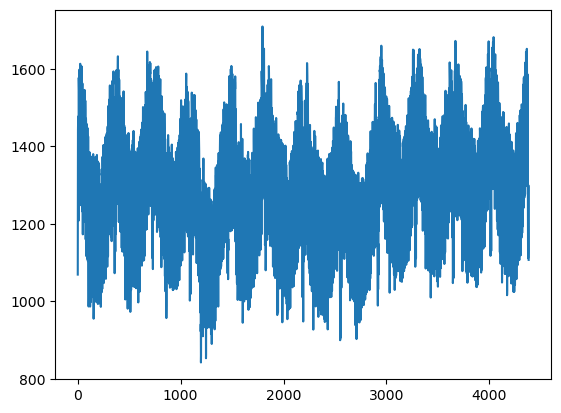

In [35]:
germ_df.Consumption.plot()
plt.show()

- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions in the acquire.py file and be able to re-run the functions and get the same data.

In [ ]:
def get_swapi_data(endpoint):
    '''
    
    '''
    
    base_url = "https://swapi.dev/api/"
    
    if os.path.isfile(f"{endpoint}.csv"):
        df = pd.read_csv(f"{endpoint}.csv", index_col=0)
    else:
        response = requests.get(base_url + endpoint + "/")
        data = response.json()
        df = pd.DataFrame(data['results'])
        
        while data['next'] != None:
            print(data['next'])
            response = requests.get(data['next'])
            data = response.json()
            df = pd.concat([df, pd.DataFrame(data['results'])], ignore_index=True)
        df.to_csv(f'{endpoint}.csv')
        
    return df